<img src="udc1.png" alt="UDC"/>

# Notebook pour le traitement et classification d'images(déchets). 

### 1. Importation des bibliothèques(importation et pré-traitement).

In [16]:
import load 
import numpy as np
import outils
import matplotlib.pyplot as plt

In [2]:
X_train, y_train, X_test, y_test = load.load_data()

In [3]:
#X_train,X_test=importdata.normalisation(X_train,X_test)
print('Trainset:', X_train.shape) 
print('Testset:', X_test.shape) 
print(np.unique(y_test,return_counts=True))

Trainset: (4196, 225, 225, 3)
Testset: (1049, 225, 225, 3)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([112, 100,  81,  91,  75, 107, 132, 113, 110, 128], dtype=int64))


In [52]:
X=(X_train[0]-225)/225

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


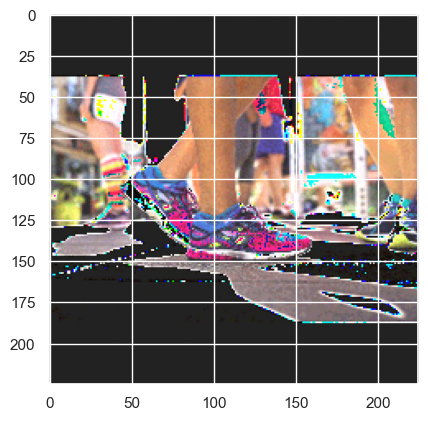

In [53]:
plt.imshow(X)

(array([0., 0., 3., 0., 0.]),
 array([254.5, 254.7, 254.9, 255.1, 255.3, 255.5]),
 <BarContainer object of 5 artists>)

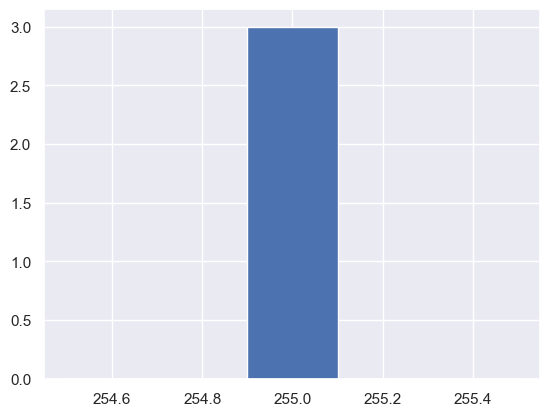

In [22]:
plt.hist(X_train[0][0][0],bins=5)

### 5.Importation des bibliothèques(classification)

In [4]:
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

### Création d'une générateur de données

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)  
test_generator = test_datagen.flow(X_test, y_test, batch_size=32)  


### 6. Configuration des Couches du Réseau de Neurones

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3 , 3), activation='relu', padding='same', input_shape=(225, 225, 3), kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2 , 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3 , 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2 , 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3 , 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2 , 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3 , 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2 , 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()


C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 225, 225, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,251,914 (50.55 MB)

 Trainable params: 13,251,914 (50.55 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

### 7. Entrainement du Réseau de Neurones.

In [7]:
initial_learning_rate = 0.01
param_surv_app1=ModelCheckpoint("classification.keras",monitor="val_accuracy",verbose=1,save_best_only=True,save_weights_only=False,mode="auto")
param_surv_app2=EarlyStopping(monitor="val_accuracy",min_delta=0,patience=5,verbose=1,mode="auto")
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
# Entrainement du modele
historique=model.fit(train_generator, epochs=45 ,validation_data=test_generator,callbacks=[param_surv_app1,param_surv_app2])

C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1118 - loss: 39.9971

C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.12583, saving model to classification.keras
132/132 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.1118 - loss: 39.8479 - val_accuracy: 0.1258 - val_loss: 5.4741
Epoch 2/45
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1149 - loss: 5.0021
Epoch 2: val_accuracy did not improve from 0.12583
132/132 ━━━━━━━━━━━━━━━━━━━━ 368s 3s/step - accuracy: 0.1148 - loss: 4.9996 - val_accuracy: 0.1077 - val_loss: 4.1203
Epoch 3/45
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1018 - loss: 3.9461
Epoch 3: val_accuracy did not improve from 0.12583
132/132 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.1018 - loss: 3.9449 - val_accuracy: 0.1077 - val_loss: 3.5044
Epoch 4/45
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1047 - loss: 3.4010
Epoch 4: val_accuracy did not improve from 0.12583
132/132 ━━━━━━━━━━━━━━━━━━━━ 340s 3s/step - accuracy: 0.1047 - loss: 3.4003 - val_accuracy: 0.1220 - val_loss: 3.1150
Epoch 5/45
132/132 ━━━━━━━━━

### 7. Visualisation de l'apprentissage

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_title'

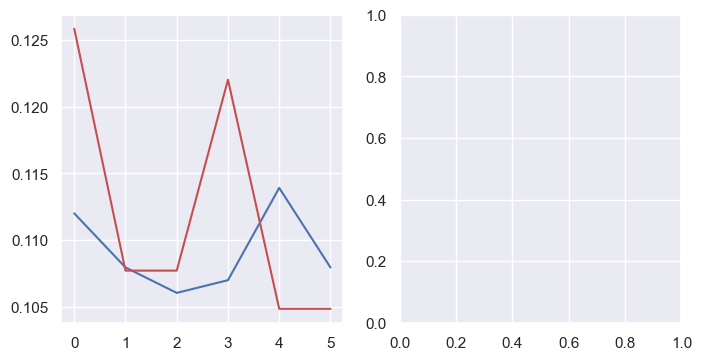

In [9]:
outils.plot_result(historique)

#### 7.1.Enregistrement du modèle

In [ ]:
model.save("classif_dechet.keras")

### 8. Évaluation du réseau de neurone sur les données de Test

In [10]:
list_name=['Batterie','Canette','Carton','Chaussure','Métal','Organique','Papier','Plastique','Textile','Verre']

33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 481ms/step


C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Moi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

========================================== La matrice de confusion =====================================================
[[  0   0   0   0   0   0   0   0 112   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0   0   0   0   0   0   0   0  81   0]
 [  0   0   0   0   0   0   0   0  91   0]
 [  0   0   0   0   0   0   0   0  75   0]
 [  0   0   0   0   0   0   0   0 107   0]
 [  0   0   0   0   0   0   0   0 132   0]
 [  0   0   0   0   0   0   0   0 113   0]
 [  0   0   0   0   0   0   0   0 110   0]
 [  0   0   0   0   0   0   0   0 128   0]]
========================================= Les différents statistiques =====================================================
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00        81
           3       0.00      0.00      0.00        91
           4       0.00      0.00      0.00        75

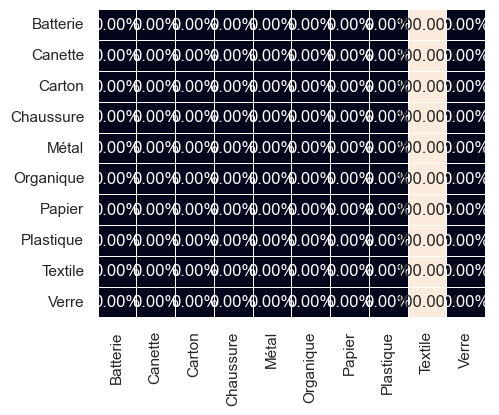

In [11]:
outils.evaluation(model=model,X_test=X_test,y_test=y_test,labels=list_name)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

model_path = 'classification1.keras'
model = load_model(model_path)


In [ ]:
path="C:/Users/Moi/Documents/garbage_classification/bio degradable/organic_003131_photo.jpg"
list_name = ['Plastique', 'Organique']


In [ ]:
# plastique1="C:/Users/Moi/Documents/Dataset/Plastique"
bio3="C:/Users/Moi/Documents/Dataset/bio dégradable"
metaux1="C:/Users/Moi/Documents/Dataset/métaux"
verre1="C:/Users/Moi/Documents/Dataset/Verre"

# Evaluation avec nos données

In [ ]:
data1=Importaion(list_chemin=[plastique1,bio3])
dataset1,list_name1=data1.importation_donnees()

In [ ]:
list_name1

In [ ]:
data1.visualisation(data=dataset1)

In [ ]:
data_tret1=Pre_traitement(dataset1)
dat1=data_tret1.encodage(list_name1)
data1.visualisation(data=dat1)

In [ ]:
data_tret1.creation_data(data=dat1,name_train='trainset0.hdf5',name_test='testset0.hdf5',test_size=0.00000000000001)
X_train1, y_train1, X_test1, y_test1=data_tret1.recharger_data(chemi_train='trainset0.hdf5',chemi_test='testset0.hdf5')

In [ ]:
X_train1,X_test1=data_tret.normalisation(X_train1,X_test1)
print('Trainset:', X_train1.shape) 
print('Testset:', X_test1.shape) 
print(np.unique(y_train1,return_counts=True))

In [ ]:
evaluation(model=model,X_test=X_train1,y_test=y_train1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.linspace(-2,2,100)
y = np.sqrt(np.abs(x))

In [ ]:
plt.plot(x,y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Définition du modèle
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', 
                           input_shape=(150, 150, 3), kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),  # Réduction du Dropout

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),  # Réduction du Dropout

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),

    # Ajout d'une transition douce entre Convolution et Dense
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    
    # Couche de sortie
    tf.keras.layers.Dense(2, activation='softmax')
])

# Hyperparamètres
initial_learning_rate = 0.0005  # Augmenté pour une meilleure convergence

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Callbacks
param_surv_app1 = ModelCheckpoint("classification.keras", monitor="val_accuracy", verbose=1, save_best_only=True, mode="auto")
param_surv_app2 = EarlyStopping(monitor="val_accuracy", patience=25, verbose=1, mode="auto")
scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Entraînement du modèle
historique = model.fit(train_generator, epochs=45, validation_data=test_generator, 
                       callbacks=[param_surv_app1, param_surv_app2, scheduler])


In [ ]:
x = 2
print([1 for i in range(x) if i% x ][1:-1])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Définition du modèle CNN optimisé
model = Sequential([
    # Bloc 1
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Bloc 2
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Bloc 3
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Bloc 4
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Couches fully connected
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Évite l'overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes de déchets
])

# Compilation du modèle
initial_learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# Affichage du résumé du modèle
model.summary()


In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
x = np.linspace(0.2,2,100)

In [50]:
y =  np.log(x)

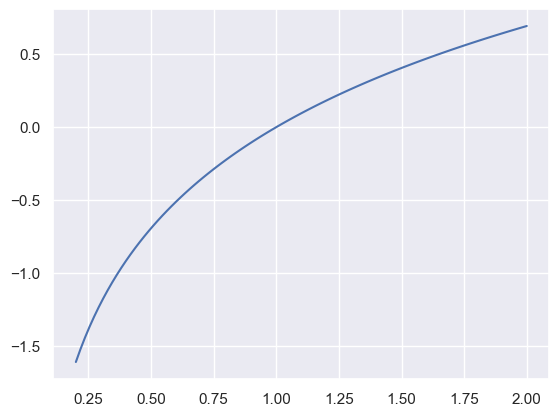

In [51]:
plt.plot(x,y)

In [ ]:
list_1 = [2,3,1,3]

In [ ]:
list_1[-1]

In [ ]:
list_1.append(8)

In [ ]:
list_1

In [ ]:
print(2)